# Manifolds: flamelet Yuki

In [1]:
import os
os.chdir('../')

In [2]:
from utils import *
from loader import *
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Patch

logging.disable(logging.CRITICAL)

In [4]:
data_path = 'data-files/'
path_data = 'data-files/'
nbr_species = 21
nbr_rows = 1536
nbr_cols = 1024

layer = 10 #chose layer to inspect

files = [i for i in listdir(data_path) if isfile(join(data_path + i))]
print(f"Number of files: {len(files)}")

state_space_names = []
state_space_source_names = [] #to check it is the same order as the state space
Not_species = ["T","U","V","W","X","Z"]
state_space = np.zeros((1,nbr_species))
data_state_space = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_state_space_source = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_mf = np.zeros((nbr_rows*nbr_cols,1))
data_T = np.zeros((nbr_rows*nbr_cols,1))

counter_state_space = 0
counter_state_space_source = 0

for file in files:
    if file.endswith('.mat'):
        print(f"Busy with {file}")

        data = loadmat(data_path + file)

        filename = file.removesuffix('.mat')
        file_data = np.array(data[filename])
        

        #if name of the file is not starting with an uppercase
        if(not file[0] == "R" and file[0].isupper() and file[0] not in Not_species):
            state_space_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space[:,counter_state_space] = flattened_data

            counter_state_space+=1

        elif(file[0] == "R"):
            state_space_source_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space_source[:,counter_state_space_source] = flattened_data

            counter_state_space_source+=1

        elif(file[0] == "Z"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_mf[:,0] = flattened_data
            
            print()
            print("mass fraction data done")
            print()

        elif(file[0] == "T"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_T[:,0] = flattened_data
            
            print()
            print("Temperature data done")
            print()

print(state_space_names)
print(f"counters of state space and sources are {counter_state_space} and {counter_state_space_source}")

Number of files: 98
Busy with curvature_Condi_3D_slices.mat
Busy with H2NN_3D_slice.mat
Busy with H2O2_3D_slice.mat
Busy with H2O_3D_slice.mat
Busy with H2_3D_slice.mat
Busy with HNO_3D_slice.mat
Busy with HO2_3D_slice.mat
Busy with HONO2_3D_slice.mat
Busy with HONO_3D_slice.mat
Busy with H_3D_slice.mat
Busy with N2H3_3D_slice.mat
Busy with N2O_3D_slice.mat
Busy with N2_3D_slice.mat
Busy with NH2_3D_slice.mat
Busy with NH_3D_slice.mat
Busy with NNH_3D_slice.mat
Busy with NO2_3D_slice.mat
Busy with NO_3D_slice.mat
Busy with N_3D_slice.mat
Busy with O2_3D_slice.mat
Busy with OH_3D_slice.mat
Busy with O_3D_slice.mat
Busy with RH2NN_3D_slice.mat
Busy with RH2O2_3D_slice.mat
Busy with RH2O_3D_slice.mat
Busy with RH2_3D_slice.mat
Busy with RHNO_3D_slice.mat
Busy with RHO2_3D_slice.mat
Busy with RHONO2_3D_slice.mat
Busy with RHONO_3D_slice.mat
Busy with RH_3D_slice.mat
Busy with RN2H3_3D_slice.mat
Busy with RN2O_3D_slice.mat
Busy with RN2_3D_slice.mat
Busy with RNH2_3D_slice.mat
Busy with RNH

## DNS

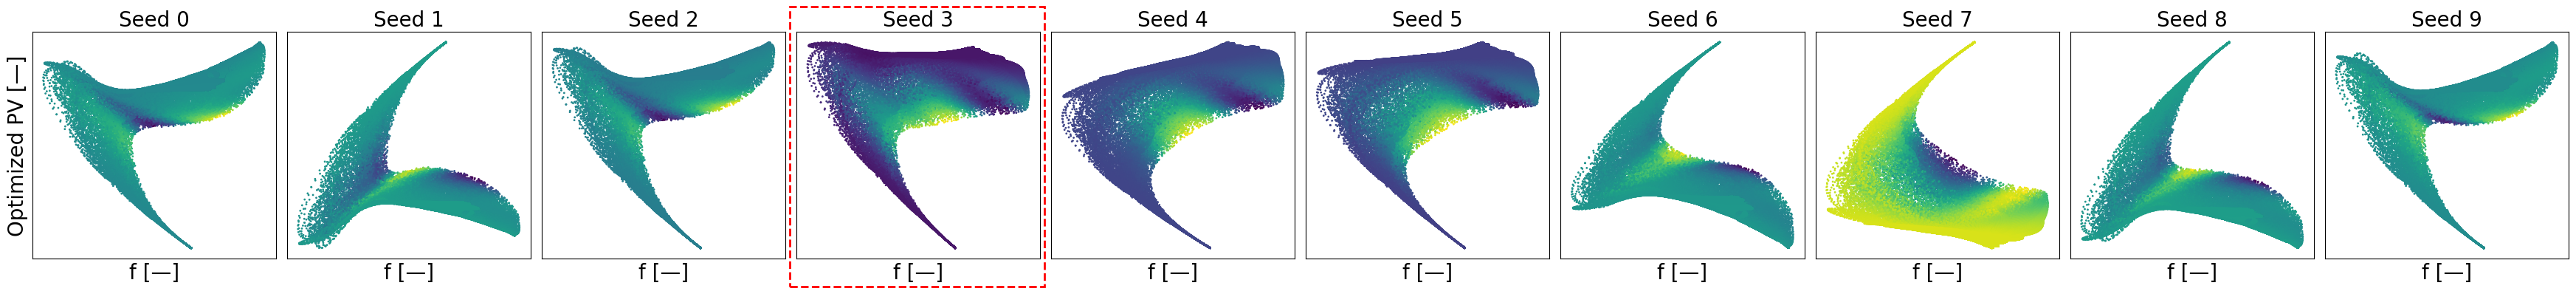

In [ ]:
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

rows, cols = 1, 10

Xu_optimized = "optimized"

save = False
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/A priori/{'Heuristic' if Xu_optimized.lower() == 'xu' else 'Optimized'}/"
name = f"f-PV manifolds - DNS - optimized 35a_Yuki - different seeds.png"

fig, axes = plt.subplots(rows, cols, figsize=(35, 4))  # Define the grid
axes = axes.flatten()
for i in range(10):
    ax = axes[i]

    filename = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Jun2025-hour_17h07_Tr35a_Yuki_s{i}"
    filename_metadata = filename + "_metadata.pkl"
    loader = loadData(filename_species_names, path_metadata, filename_metadata)
    idx_species_removed = loader.metadata["idx species removed"]
    model = loader.loadModel()
    id_model = loader.metadata["Training_id"]
    output_idx = loader.metadata["output species idx"]
    idx_species_removed = loader.metadata["idx species removed"]
    input_scaling = loader.metadata["input scaling"]
    input_species_scaling = loader.metadata["input species scaling"]
    input_species_bias = loader.metadata["input species bias"]
    range_mf  = loader.metadata["range_mf"]

    optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
    optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

    ax.scatter(data_mf, optimized_PV, c = optimized_PV_source, cmap = "viridis", s=1)

    ax.set_xlabel("f [\u2014]", fontsize = 20)
    ax.set_xticks([])
    if(i%cols == 0):
        ax.set_ylabel(f'Optimized PV [\u2014]', fontsize = 20)
    ax.set_yticks([])
    

    ax.set_title(f"Seed {i}", fontsize=20)

    if i == 3:
        bbox = ax.get_position()
        plt.gcf().add_artist(plt.Rectangle(
            (bbox.x0 - 0.825*bbox.width, bbox.y0 - 0.11*bbox.height),
            1.5*bbox.width,
            bbox.height + 0.23*bbox.height,
            fill=False,
            edgecolor='red',
            linestyle='--',
            linewidth=2,
            transform=plt.gcf().transFigure,
            zorder=10
        ))


plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()

## Flamelet

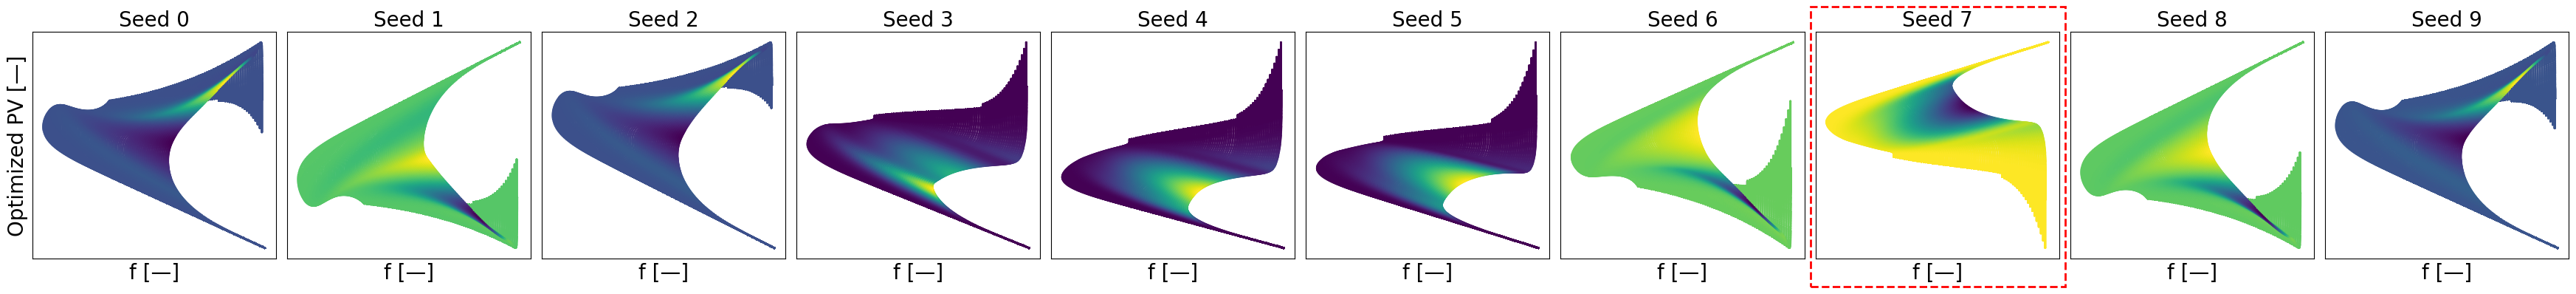

In [16]:
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

rows, cols = 1, 10

Xu_optimized = "optimized"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/A priori/{'Heuristic' if Xu_optimized.lower() == 'xu' else 'Optimized'}/"
name = f"f-PV manifolds - DNS - optimized 35a_Yuki - different seeds.png"

fig, axes = plt.subplots(rows, cols, figsize=(35, 4))  # Define the grid
axes = axes.flatten()
for i in range(10):
    ax = axes[i]

    filename = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Jun2025-hour_17h07_Tr35a_Yuki_s{i}"
    filename_metadata = filename + "_metadata.pkl"
    loader = loadData(filename_species_names, path_metadata, filename_metadata)
    idx_species_removed = loader.metadata["idx species removed"]
    model = loader.loadModel()
    id_model = loader.metadata["Training_id"]
    output_idx = loader.metadata["output species idx"]
    idx_species_removed = loader.metadata["idx species removed"]
    input_scaling = loader.metadata["input scaling"]
    input_species_scaling = loader.metadata["input species scaling"]
    input_species_bias = loader.metadata["input species bias"]
    range_mf  = loader.metadata["range_mf"]

    optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
    optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()
    
    dataset = "flamelet-Yuki"
    input_fl, output_fl = get_dataset(path_data + f"Xu-state-space-{dataset}.csv", path_data + f"Xu-state-space_source-{dataset}.csv",
                                    path_data + f"Xu-T-{dataset}.csv", path_data + f"Xu-mf-{dataset}.csv", output_idx,
                                    idx_species_removed, input_scaling, input_species_scaling, input_species_bias, range_mf)
    mf_fl, PV_fl, PV_source_fl = model.get_mf_PV_PVsource(input_fl, output_fl)

    ax.scatter(mf_fl, PV_fl, c = PV_source_fl, cmap = "viridis", s=1)

    ax.set_xlabel("f [\u2014]", fontsize = 20)
    ax.set_xticks([])
    if(i%cols == 0):
        ax.set_ylabel(f'Optimized PV [\u2014]', fontsize = 20)
    ax.set_yticks([])
    

    ax.set_title(f"Seed {i}", fontsize=20)

    if i == 7:
        bbox = ax.get_position()
        plt.gcf().add_artist(plt.Rectangle(
            (bbox.x0 + 0.39*bbox.width, bbox.y0 - 0.11*bbox.height),
            1.5*bbox.width,
            bbox.height + 0.23*bbox.height,
            fill=False,
            edgecolor='red',
            linestyle='--',
            linewidth=2,
            transform=plt.gcf().transFigure,
            zorder=10
        ))


plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()

## Comparison optimized PV on flamelet and extended flamelet

C:\Windows\Temp\ipykernel_29440\248065352.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


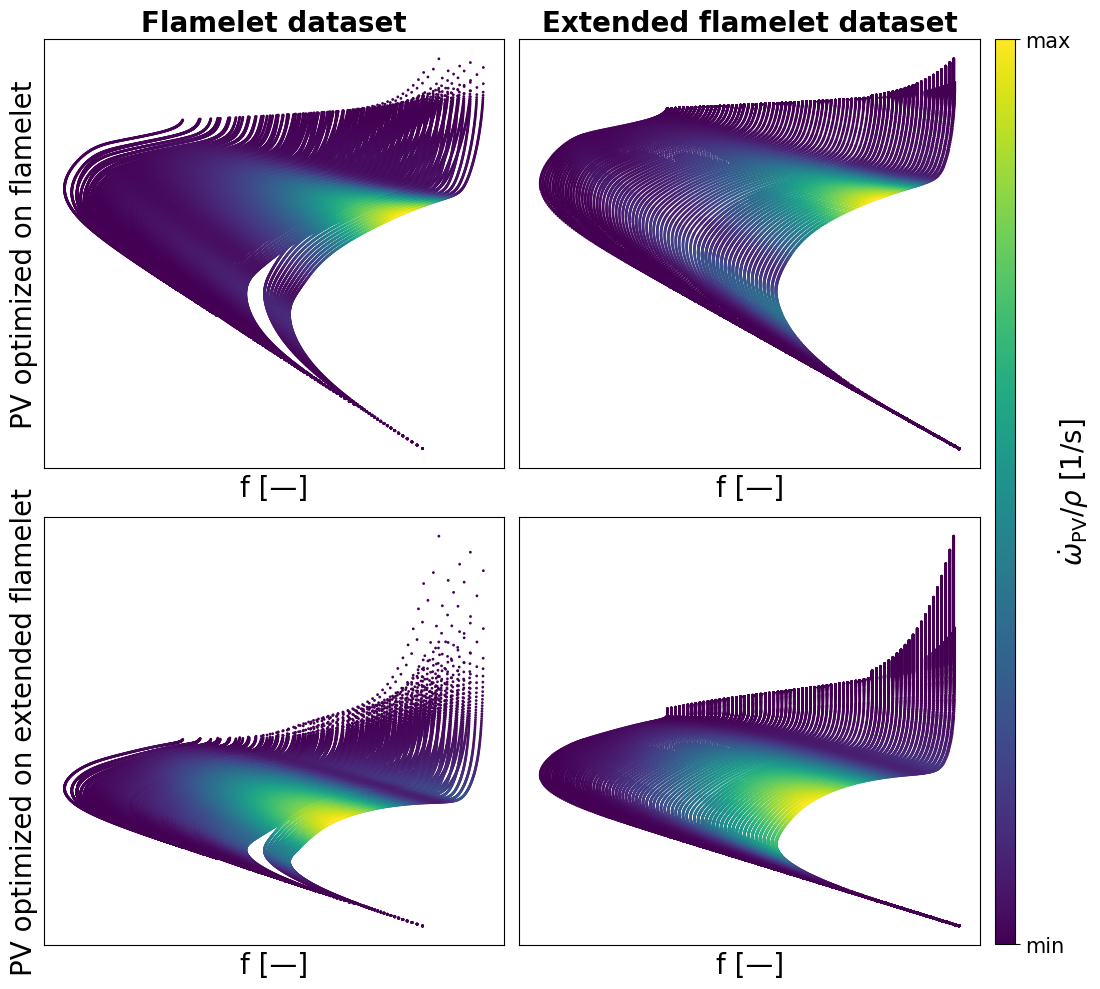

In [42]:
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

rows, cols = 2, 2

Xu_optimized = "optimized"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/A priori/{'Heuristic' if Xu_optimized.lower() == 'xu' else 'Optimized'}/"
name = f"f-PV manifolds - flamelet and flamelet Yuki - optimized 35a_s3 vs 35a_Yuki_s7.png"

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))  # Define the grid
axes = axes.flatten()

ax = axes[0]

filename = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s3"
filename_metadata = filename + "_metadata.pkl"
loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["idx species removed"]
model = loader.loadModel()
id_model = loader.metadata["Training_id"]
output_idx = loader.metadata["output species idx"]
idx_species_removed = loader.metadata["idx species removed"]
input_scaling = loader.metadata["input scaling"]
input_species_scaling = loader.metadata["input species scaling"]
input_species_bias = loader.metadata["input species bias"]
range_mf  = loader.metadata["range_mf"]

optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

dataset = "flamelet"
input_fl, output_fl = get_dataset(path_data + f"Xu-state-space-{dataset}.csv", path_data + f"Xu-state-space_source-{dataset}.csv",
                                path_data + f"Xu-T-{dataset}.csv", path_data + f"Xu-mf-{dataset}.csv", output_idx,
                                idx_species_removed, input_scaling, input_species_scaling, input_species_bias, range_mf)
mf_fl, PV_fl, PV_source_fl = model.get_mf_PV_PVsource(input_fl, output_fl)

ax.scatter(mf_fl, PV_fl, c = PV_source_fl, cmap = "viridis", s=1)

ax.set_xlabel("f [\u2014]", fontsize = 20)
ax.set_xticks([])
ax.set_ylabel(f'PV optimized on flamelet', fontsize = 20)
ax.set_yticks([])


ax.set_title(f"Flamelet dataset", weight = "bold", fontsize=20)


ax = axes[1]

optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

dataset = "flamelet-Yuki"
input_fl, output_fl = get_dataset(path_data + f"Xu-state-space-{dataset}.csv", path_data + f"Xu-state-space_source-{dataset}.csv",
                                path_data + f"Xu-T-{dataset}.csv", path_data + f"Xu-mf-{dataset}.csv", output_idx,
                                idx_species_removed, input_scaling, input_species_scaling, input_species_bias, range_mf)
mf_fl, PV_fl, PV_source_fl = model.get_mf_PV_PVsource(input_fl, output_fl)

ax.scatter(mf_fl, PV_fl, c = PV_source_fl, cmap = "viridis", s=1)

ax.set_xlabel("f [\u2014]", fontsize = 20)
ax.set_xticks([])
ax.set_yticks([])


ax.set_title(f"Extended flamelet dataset", weight ="bold", fontsize=20)

ax = axes[2]

filename = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Jun2025-hour_17h07_Tr35a_Yuki_s7"
filename_metadata = filename + "_metadata.pkl"
loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["idx species removed"]
model = loader.loadModel()
id_model = loader.metadata["Training_id"]
output_idx = loader.metadata["output species idx"]
idx_species_removed = loader.metadata["idx species removed"]
input_scaling = loader.metadata["input scaling"]
input_species_scaling = loader.metadata["input species scaling"]
input_species_bias = loader.metadata["input species bias"]
range_mf  = loader.metadata["range_mf"]


dataset = "flamelet"
input_fl, output_fl = get_dataset(path_data + f"Xu-state-space-{dataset}.csv", path_data + f"Xu-state-space_source-{dataset}.csv",
                                path_data + f"Xu-T-{dataset}.csv", path_data + f"Xu-mf-{dataset}.csv", output_idx,
                                idx_species_removed, input_scaling, input_species_scaling, input_species_bias, range_mf)
mf_fl, PV_fl, PV_source_fl = model.get_mf_PV_PVsource(input_fl, output_fl)

ax.scatter(mf_fl, -PV_fl, c = -PV_source_fl, cmap = "viridis", s=1)

ax.set_xlabel("f [\u2014]", fontsize = 20)
ax.set_xticks([])
ax.set_ylabel(f'PV optimized on extended flamelet', fontsize = 20)
ax.set_yticks([])




ax = axes[3]

optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

dataset = "flamelet-Yuki"
input_fl, output_fl = get_dataset(path_data + f"Xu-state-space-{dataset}.csv", path_data + f"Xu-state-space_source-{dataset}.csv",
                                path_data + f"Xu-T-{dataset}.csv", path_data + f"Xu-mf-{dataset}.csv", output_idx,
                                idx_species_removed, input_scaling, input_species_scaling, input_species_bias, range_mf)
mf_fl, PV_fl, PV_source_fl = model.get_mf_PV_PVsource(input_fl, output_fl)

sc = ax.scatter(mf_fl, -PV_fl, c = -PV_source_fl, cmap = "viridis", s=1)

ax.set_xlabel("f [\u2014]", fontsize = 20)
ax.set_xticks([])
ax.set_yticks([])

cax = fig.add_axes([1, 0.05, 0.02, 0.905])

cbar = fig.colorbar(sc, cax=cax, orientation='vertical')
cbar.set_label(r'$\dot{\omega}_{\mathrm{PV}} / \rho$ [1/s]', fontsize=20, labelpad=-10)

# Remove numeric ticks, replace with min/max text
vmin = -PV_source_fl.min()
vmax = -PV_source_fl.max()
cbar.set_ticks([vmax, vmin])
cbar.set_ticklabels([f"min", f"max"], fontsize = 15)


plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()